: Given the dataset of 30 students' study hours and exam scores, how would you build a linear regression model to predict exam scores? Describe the steps you would take to diagnose the regression model, including checking assumptions, identifying outliers, and handling influential points. Finally, evaluate the model's performance and discuss any insights gained.

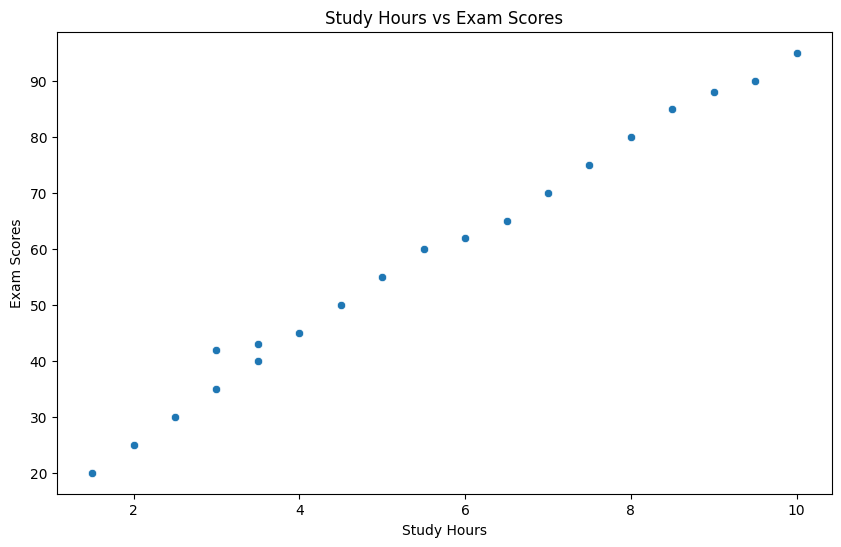

Mean Absolute Error (MAE): 2.6929640445336807
Mean Squared Error (MSE): 10.339871460298047
Root Mean Squared Error (RMSE): 3.215567051127693
R-squared: 0.9891920073584132


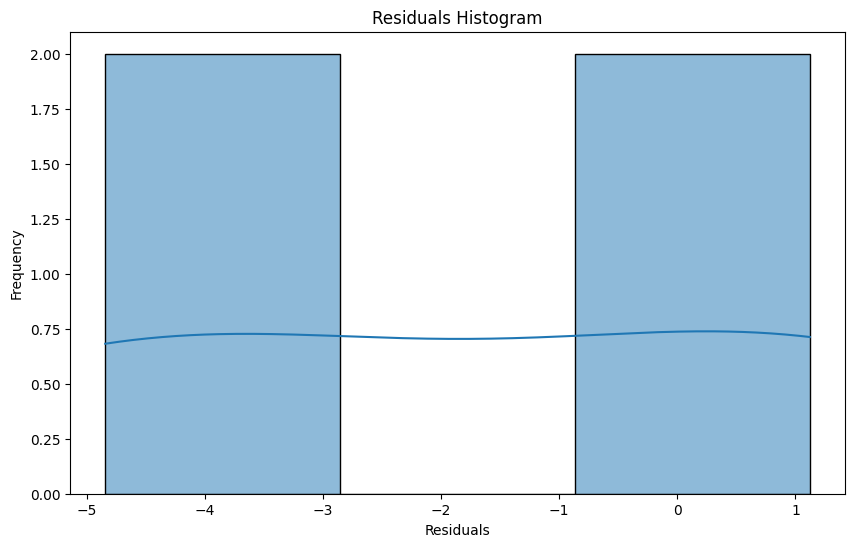

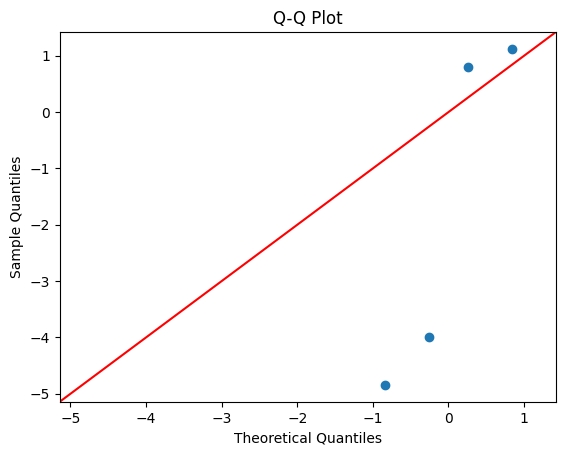

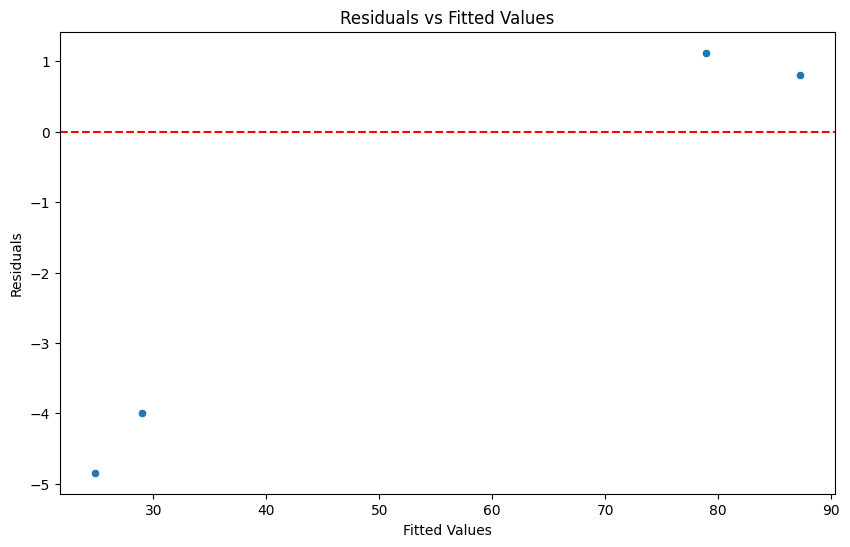

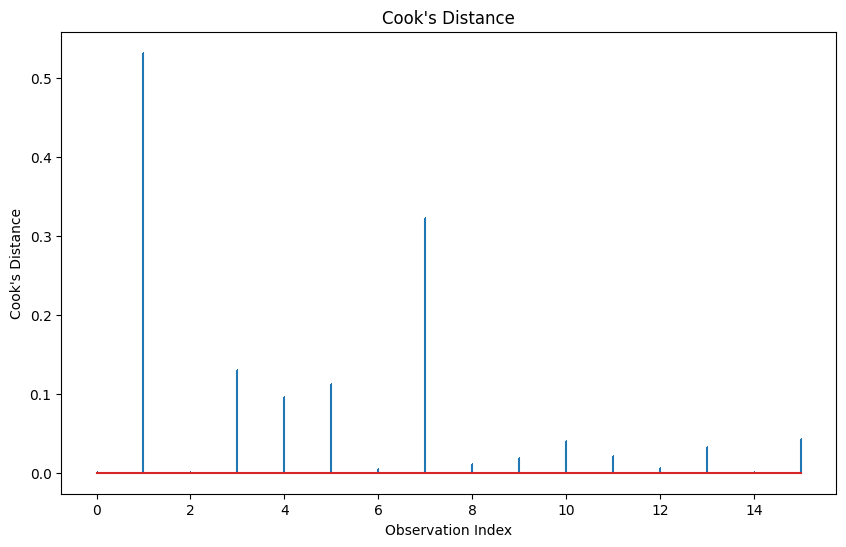

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import statsmodels.api as sm

# Load the dataset
# Assuming you have a DataFrame 'df' with columns 'study_hours' and 'exam_scores'
df = pd.DataFrame({
    'study_hours': [1.5, 2.0, 2.5, 3.0, 3.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0, 9.5, 10.0],
    'exam_scores': [20, 25, 30, 35, 40, 42, 43, 45, 50, 55, 60, 62, 65, 70, 75, 80, 85, 88, 90, 95]
})

# Exploratory Data Analysis
plt.figure(figsize=(10,6))
sns.scatterplot(x='study_hours', y='exam_scores', data=df)
plt.title('Study Hours vs Exam Scores')
plt.xlabel('Study Hours')
plt.ylabel('Exam Scores')
plt.show()

# Split the data into training and test sets
X = df[['study_hours']]
y = df['exam_scores']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R-squared:", r2_score(y_test, y_pred))

# Diagnose the model
# Check residuals
residuals = y_test - y_pred
plt.figure(figsize=(10,6))
sns.histplot(residuals, kde=True)
plt.title('Residuals Histogram')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Q-Q plot for normality
sm.qqplot(residuals, line='45')
plt.title('Q-Q Plot')
plt.show()

# Residuals vs Fitted values
plt.figure(figsize=(10,6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, linestyle='--', color='red')
plt.title('Residuals vs Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

# Check for outliers and influential points
influence = sm.OLS(y_train, sm.add_constant(X_train)).fit().get_influence()
(c, p) = influence.cooks_distance
plt.figure(figsize=(10,6))
plt.stem(np.arange(len(c)), c, markerfmt=",")
plt.title('Cook\'s Distance')
plt.xlabel('Observation Index')
plt.ylabel('Cook\'s Distance')
plt.show()
